## IMPORTS

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

###Creating a Pseudo-Dataset

In [2]:
def dataset_developer(n, probability=[0.05, 0.05, 0.15, 0.5, 0.15]):
	X = []
	while len(X)<n:
		t = random.random()
		if t<probability[0]:
			X.append(random.random()*0.2)
		elif t>=probability[0] and t<probability[1]+probability[0]:
			X.append(random.random()*0.2+0.2)
		elif t>= probability[1]+probability[0] and t<probability[0]+probability[1]+probability[2]:
			X.append(random.random()*0.2+0.2*2)
		elif t>=probability[0]+probability[1]+probability[2] and t<probability[0]+probability[1]+probability[2]+probability[3]:
			X.append(random.random()*0.2+0.2*3)
		else:
			X.append(random.random()*0.2+0.2*4)
	return X

## Numeric Outlier Method

In [3]:
def numeric_outlier(X, k):
	Q1 = X[int((len(X)+1)/4)]
	Q3 = X[int(((len(X)+1)*3)/4)]
	IQR = Q3 - Q1
	outliers_index = [i for i in range(len(X)) if X[i]<Q1-k*IQR or X[i]>Q3+k*IQR]
	return outliers_index

### Visualising Results

In [4]:
def imager(X, Y, outlier_X, outlier_Y, l):
	X = random.sample(X, len(X))
	outlier_X = random.sample(outlier_X, l)
	plt.scatter(X, Y, color='green', marker='.')
	plt.scatter(outlier_X, outlier_Y, color='red', marker='*')
	plt.plot()

### Checking Results

In [5]:
def accuracy(outliers_index, X):
	accuracy = 0
	for j in range(len(X)):
		if j in outliers_index:
			if X[j]<0.5 or X[j]>0.9:
				accuracy += 1
		else:
			if X[j]>=0.5 and X[j]<=0.9:
				accuracy += 1
	return accuracy/len(X)

### Creating MAIN

In [6]:
def main(X, k):
	outliers_index = numeric_outlier(X, k)
	outliers = [X[i] for i in outliers_index]
	X_c = [X[i] for i in range(len(X)) if i not in outliers_index]
	imager(range(len(X_c)), X_c, range(len(X_c)), outliers, len(outliers_index))
	return accuracy(outliers_index, X)

0.985


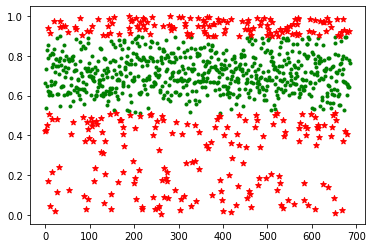

In [7]:
k = 0.45
random.seed(0)
X = dataset_developer(1000)
X.sort()
acc = main(X, k)
print(acc)